In [35]:
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
pd.set_option("display.max_rows", 50)
path = "./data/shinra2022jp_lake.csv"
html_path = "./data/Location/html/Lake/"
text_path = "./data/Location/plain/Lake/"
annotation_path = "./data/Location/annotation/Lake_dist.json"
system_data_path = "./data/system_df.csv"

In [36]:
def remove_return(s):
    return s.replace("\n", "")

In [37]:
df = pd.read_csv(path, index_col = 0)
df = df.reset_index(drop=True)
df['index_id'] = [i+1000 for i in range(len(df))]
df['text_text'] = df['text_text'].apply(remove_return)
df.head()

,page_id,title,attribute,text_offset_start_line_id,text_offset_start_offset,text_text,html_offset_start_line_id,html_offset_start_offset,html_text,text_offset_end_line_id,...,worker_m4AfTvGY,worker_kazuya23001,worker_y-ichii,worker_hey8,worker_miniC1kame,count_yes,count_no,count_na,MV,index_id
0,252336,多々良沼,別名,61,43,ヘラブナ,61,232,ヘラブナ,61,...,NaN,NaN,NaN,NaN,NaN,0,10,0,no,1000
1,687963,藺牟田池,植物,70,18,ジュンサイ,70,222,ジュンサイ,70,...,NaN,NaN,NaN,NaN,NaN,10,0,0,yes,1001
2,951230,泡瀬干潟,産業,151,0,漁業,151,65,漁業,151,...,NaN,NaN,NaN,NaN,NaN,7,1,2,yes,1002
3,443223,トバ湖,種類,46,52,カルデラ湖,46,491,カルデラ湖,46,...,NaN,NaN,NaN,NaN,NaN,9,0,1,yes,1003
4,143182,木崎湖,観光地,82,10,ゆーぷる,82,170,ゆーぷる,82,...,NaN,NaN,NaN,NaN,NaN,8,2,0,yes,1004


In [70]:
df = pd.read_csv(system_data_path, index_col = 0)
attribute_list = df['attribute'].value_counts(normalize=True) * 100 >= 1.0
attribute_df= pd.DataFrame(attribute_list).reset_index()
attribute_df = attribute_df.rename(columns={"index": "attribute", "attribute":"filter"})
df = pd.merge(df, attribute_df, on='attribute')
df = df[df['filter']][['text_text', 'attribute']]
df

,text_text,attribute
0,愛知県刈谷市井ヶ谷町小堤西1面積,所在地
1,愛知県刈谷市井ヶ谷町小堤西1,所在地
2,愛知県刈谷市井ヶ谷町小堤西1,所在地
3,静岡県伊東市吉田,所在地
4,伊豆半島東岸,所在地
...,...,...
8486,トレント川,流入・流出河川
8487,ジェネシー川,流入・流出河川
8488,オスウェゴ川,流入・流出河川
8489,ブラック川,流入・流出河川


In [43]:
len(df['attribute'])

884

# データの集計
- 固有表現の全体の数
- システムの数
- 解答してくれたワーカーの数
- 固有表現の総数
- データの総数等々

In [4]:
# データの総数
len(df)

884

In [5]:
# システムの数
len(df.filter(regex="system_*").columns)

6

In [6]:
# ワーカーの数の平均
d = df['count_yes'] + df['count_no'] + df['count_na']
d.sum()/len(d)

10.0

In [7]:
# アノテーションデータ内の固有表現の種類
import os
import json
base_path = "./data/Location/annotation/"
paths = os.listdir(path=base_path)
annotation = []
for path in paths:
    p = base_path + path.replace("_for_view", "")
    with open(p,mode="rb") as f:
        for j in f.readlines():
            json_dict = json.loads(j)
            annotation.append(json_dict)
annotation_df = pd.DataFrame(annotation)
annotation_df['attribute'].unique()

array(['別名', '国', '所在地', '種類', '構成する地形', '読み', '国内位置', '長さ', '高さ',
       '名前の謂れ', '選定されたタイトル', '座標・緯度', '座標・経度', '面積', '動物', '植物', '幅',
       'タイトル選定の年', '水深', '主要都市', '州都・県庁・郡庁所在地', '人口', '特産品', '消滅年', '成立年',
       '隣接自治体', '人口データの年', '地形', '首長', '人口密度', '接する国', '観光地', '合併自治体',
       '地名の謂れ', '産業', '恒例行事', '構成自治体', '属する山系', '付近の山地名', '標高', '公園',
       '神霊', '河川', '初登頂者名・登山隊名', '初登頂年', '湖沼', '含有岩石', '構成する山', '最高峰',
       '延長', '大陸地域', '大陸地域内位置', '登頂者', '登頂者の国籍', '登山隊', '構成国', '構成地域',
       '民族', '言語', '戦争', '成立時期', '統治国家', '公用語', '公用語以外の言語', '島', '沿岸地域区分',
       '属する海域', '最大水深', '構成する海域', '港', '形成時期', '橋・トンネル', '海岸', '表面積',
       '平均水深', '流速', '水面標高', '流入・流出河川', '湖岸の地域区分', '水質（淡水・汽水）', '成因',
       '貯水量', '周囲長', '透明度', '構成する湖沼', '水源', '流入・合流先', '流入元', '流域面積',
       '平均流量', '水源の標高', 'ダム', '開湯年', '泉質', '属する温泉郷', '付近の河川', '最寄駅',
       '最寄路線', '液性', '泉温', '構成する温泉', '湧出量', '源泉名', 'ｐＨ', '記念碑', '国名',
       '構成する湾', '属する湾', '湾口幅', '氷結時期', '海岸線の長さ', '海洋', '海洋内位置',
       '付近の大陸・地形',

In [8]:
# アノテーションデータ固有表現の数
len(annotation_df['attribute'].unique())

131

In [9]:
# システムが抽出した固有表現の数
d = df.filter(regex="attribute|system_*")
system_name = d.columns
d.head()
print(system_name)
for s in system_name:
    system_out = d[s]

Index(['attribute', 'system_03011', 'system_10011', 'system_05010',
       'system_07011', 'system_02010', 'system_01011'],
      dtype='object')


# データの加工
- 正解率の集計

In [10]:
# システムの出力から分布を決定する
system_d = df.filter(regex="index_id|system_*", axis=1)
system_d = system_d.fillna(False)
system_d['system_true_count'] = (system_d == True).sum(axis=1)
system_d['system_false_count'] = (system_d == False).sum(axis=1)
system_d = system_d[['index_id','system_true_count','system_false_count']]
system_d.head()

,index_id,system_true_count,system_false_count
0,1000,1,5
1,1001,3,3
2,1002,1,5
3,1003,5,1
4,1004,1,5


In [11]:
df = pd.merge(df,system_d)
df.drop_duplicates().drop("index_id",axis=1).head()

,page_id,title,attribute,text_offset_start_line_id,text_offset_start_offset,text_text,html_offset_start_line_id,html_offset_start_offset,html_text,text_offset_end_line_id,...,worker_kazuya23001,worker_y-ichii,worker_hey8,worker_miniC1kame,count_yes,count_no,count_na,MV,system_true_count,system_false_count
0,252336,多々良沼,別名,61,43,ヘラブナ,61,232,ヘラブナ,61,...,NaN,NaN,NaN,NaN,0,10,0,no,1,5
1,687963,藺牟田池,植物,70,18,ジュンサイ,70,222,ジュンサイ,70,...,NaN,NaN,NaN,NaN,10,0,0,yes,3,3
2,951230,泡瀬干潟,産業,151,0,漁業,151,65,漁業,151,...,NaN,NaN,NaN,NaN,7,1,2,yes,1,5
3,443223,トバ湖,種類,46,52,カルデラ湖,46,491,カルデラ湖,46,...,NaN,NaN,NaN,NaN,9,0,1,yes,5,1
4,143182,木崎湖,観光地,82,10,ゆーぷる,82,170,ゆーぷる,82,...,NaN,NaN,NaN,NaN,8,2,0,yes,1,5


In [12]:
df_filtered = df[['title','text_text', 'attribute', 'system_true_count', 'system_false_count', 'count_yes', 'count_no', 'count_na','correct']]
df_filtered['count_no'] = df_filtered['count_no'] + df_filtered['count_na']
df_filtered = df_filtered.drop('count_na', axis=1)
df_filtered.head()

/var/folders/0d/ymh4sl0938l6sklhx63b6m500000gn/T/ipykernel_5656/4189219928.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['count_no'] = df_filtered['count_no'] + df_filtered['count_na']


,title,text_text,attribute,system_true_count,system_false_count,count_yes,count_no,correct
0,多々良沼,ヘラブナ,別名,1,5,0,10,False
1,藺牟田池,ジュンサイ,植物,3,3,10,0,True
2,泡瀬干潟,漁業,産業,1,5,7,3,False
3,トバ湖,カルデラ湖,種類,5,1,9,1,True
4,木崎湖,ゆーぷる,観光地,1,5,8,2,False


In [13]:
df_filtered.to_csv('train.csv',index=False)

In [14]:
df_filtered['system_dicision'] = (df_filtered['system_true_count'] > df_filtered['system_false_count'])
df_filtered['worker_dicision'] = (df_filtered['count_yes'] > df_filtered['count_no'])
t_df = df_filtered[['correct', 'system_dicision', 'worker_dicision']]
t_df.head()

,correct,system_dicision,worker_dicision
0,False,False,False
1,True,False,True
2,False,False,True
3,True,True,True
4,False,False,True


In [15]:
system_count, worker_count = 6, 10

In [16]:
data = []
for i in range(system_count+1):
    system_dicision = (df['system_true_count'] >= i)
    correct = df['correct']
    confusion_m = confusion_matrix(correct, system_dicision)
    precision = precision_score(correct, system_dicision)
    recall = recall_score(correct, system_dicision)
    f1 = f1_score(correct, system_dicision)
    data.append({"majority_num": i, "precision" : precision, "recall": recall, "f1": f1})
data = pd.DataFrame(data)

In [17]:
data

,majority_num,precision,recall,f1
0,0,0.343891,1.000000,0.511785
1,1,0.343891,1.000000,0.511785
2,2,0.739255,0.848684,0.790199
3,3,0.864000,0.710526,0.779783
4,4,0.923077,0.473684,0.626087
5,5,0.973333,0.240132,0.385224
6,6,1.000000,0.019737,0.038710


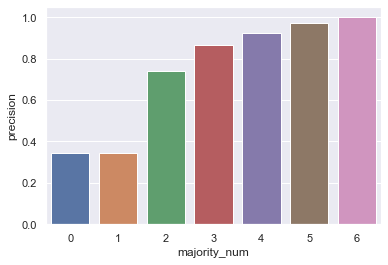

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
sns.barplot(
    data = data, x = "majority_num", y = "precision"
)
plt.savefig("img/system_precision.png")

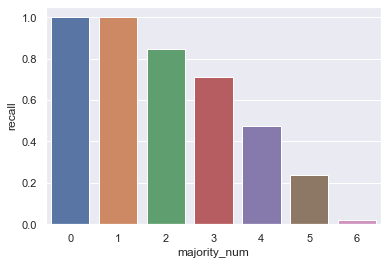

In [19]:
sns.barplot(
    data = data, x = "majority_num", y = "recall"
)
plt.savefig("img/system_recall.png")

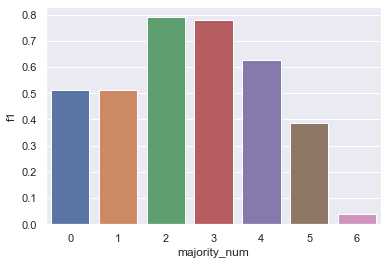

In [20]:
sns.barplot(
    data = data, x = "majority_num", y = "f1"
)
plt.savefig("img/system_f1.png")

In [21]:
data = []
for i in range(worker_count+1):
    worker_dicision = (df['count_yes'] >= i)
    correct = df['correct']
    confusion_m = confusion_matrix(correct, worker_dicision)
    precision = precision_score(correct, worker_dicision)
    recall = recall_score(correct, worker_dicision)
    f1 = f1_score(correct, worker_dicision)
    data.append({"majority_num": i, "precision" : precision, "recall": recall, "f1": f1})
data = pd.DataFrame(data)

In [22]:
data

,majority_num,precision,recall,f1
0,0,0.343891,1.000000,0.511785
1,1,0.385298,1.000000,0.556267
2,2,0.425175,1.000000,0.596663
3,3,0.460606,1.000000,0.630705
4,4,0.495114,1.000000,0.662309
5,5,0.525394,0.986842,0.685714
6,6,0.555344,0.957237,0.702899
7,7,0.579381,0.924342,0.712294
8,8,0.630170,0.851974,0.724476
9,9,0.665625,0.700658,0.682692


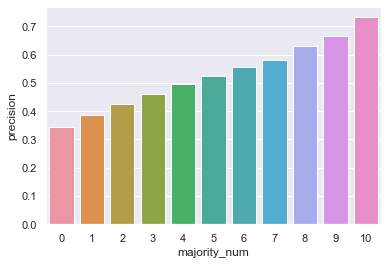

In [23]:
plot = sns.barplot(
    data = data, x = "majority_num", y = "precision"
)
plt.savefig("img/worker_precision.png")

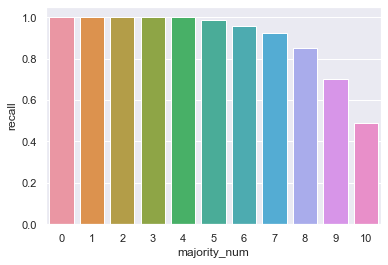

In [24]:
sns.barplot(
    data = data, x = "majority_num", y = "recall"
)
plt.savefig("img/worker_recall.png")

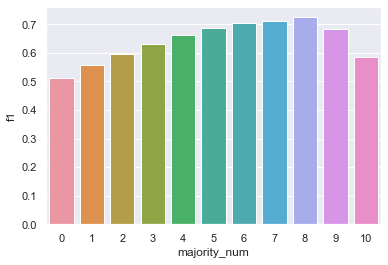

In [25]:
sns.barplot(
    data = data, x = "majority_num", y = "f1"
)
plt.savefig("img/woker_f1.png")

In [26]:
df

,page_id,title,attribute,text_offset_start_line_id,text_offset_start_offset,text_text,html_offset_start_line_id,html_offset_start_offset,html_text,text_offset_end_line_id,...,worker_y-ichii,worker_hey8,worker_miniC1kame,count_yes,count_no,count_na,MV,index_id,system_true_count,system_false_count
0,252336,多々良沼,別名,61,43,ヘラブナ,61,232,ヘラブナ,61,...,NaN,NaN,NaN,0,10,0,no,1000,1,5
1,687963,藺牟田池,植物,70,18,ジュンサイ,70,222,ジュンサイ,70,...,NaN,NaN,NaN,10,0,0,yes,1001,3,3
2,951230,泡瀬干潟,産業,151,0,漁業,151,65,漁業,151,...,NaN,NaN,NaN,7,1,2,yes,1002,1,5
3,443223,トバ湖,種類,46,52,カルデラ湖,46,491,カルデラ湖,46,...,NaN,NaN,NaN,9,0,1,yes,1003,5,1
4,143182,木崎湖,観光地,82,10,ゆーぷる,82,170,ゆーぷる,82,...,NaN,NaN,NaN,8,2,0,yes,1004,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,192531,ヴァン湖,水深,75,57,"1,300 ft",75,775,"1,300&#160;ft",75,...,NaN,NaN,NaN,7,3,0,yes,1879,1,5
880,2280167,プレスパ湖,種類,40,0,地殻変動型,40,0,地殻変動型,40,...,NaN,NaN,NaN,10,0,0,yes,1880,3,3
881,2433098,小林沼,別名,49,49,コイ,49,215,コイ,49,...,NaN,NaN,NaN,0,10,0,no,1881,1,5
882,2388853,大谷池,水質（淡水・汽水）,51,0,淡水,51,0,淡水,51,...,NaN,NaN,NaN,10,0,0,yes,1882,5,1


In [27]:
df = pd.read_csv(system_data_path)
df = df.filter(regex="text_text|attribute|system_*|correct").fillna(False)
df['index'] = df['index_id'] = [i+1000 for i in range(len(df))]
df.head()

,attribute,text_text,system_03011,system_10011,system_05010,system_07011,system_02010,system_01011,correct,index,index_id
0,所在地,愛知県刈谷市井ヶ谷町小堤西1面積,True,False,False,False,False,False,False,1000,1000
1,所在地,愛知県刈谷市井ヶ谷町小堤西1,True,True,True,True,True,False,True,1001,1001
2,所在地,愛知県刈谷市井ヶ谷町小堤西1,False,True,True,True,True,False,True,1002,1002
3,読み,こづつみにしいけ,True,True,True,True,True,False,True,1003,1003
4,種類,水田灌漑用の池,True,False,False,False,False,False,False,1004,1004


In [28]:
tmp_df = df.filter(regex="index|system_*")
tmp_df['true_count'] = tmp_df[tmp_df == True].sum(axis=1)
tmp_df['false_count'] = 6 - tmp_df['true_count']
tmp_df.head()

/var/folders/0d/ymh4sl0938l6sklhx63b6m500000gn/T/ipykernel_5656/3999693732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['true_count'] = tmp_df[tmp_df == True].sum(axis=1)
/var/folders/0d/ymh4sl0938l6sklhx63b6m500000gn/T/ipykernel_5656/3999693732.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['false_count'] = 6 - tmp_df['true_count']


,system_03011,system_10011,system_05010,system_07011,system_02010,system_01011,index,index_id,true_count,false_count
0,True,False,False,False,False,False,1000,1000,1.0,5.0
1,True,True,True,True,True,False,1001,1001,5.0,1.0
2,False,True,True,True,True,False,1002,1002,4.0,2.0
3,True,True,True,True,True,False,1003,1003,5.0,1.0
4,True,False,False,False,False,False,1004,1004,1.0,5.0


In [29]:
df = pd.merge(tmp_df, df)
df = df.filter(regex="index|true_count|false_count|attribute|text_text|correct")
df.head()

,index,index_id,true_count,false_count,attribute,text_text,correct
0,1000,1000,1.0,5.0,所在地,愛知県刈谷市井ヶ谷町小堤西1面積,False
1,1001,1001,5.0,1.0,所在地,愛知県刈谷市井ヶ谷町小堤西1,True
2,1002,1002,4.0,2.0,所在地,愛知県刈谷市井ヶ谷町小堤西1,True
3,1003,1003,5.0,1.0,読み,こづつみにしいけ,True
4,1004,1004,1.0,5.0,種類,水田灌漑用の池,False


In [30]:
data = []
for i in range(7):
    out = df['true_count'] > i
    answer = df['correct']
    matrix = confusion_matrix(answer, out)
    pre = precision_score(answer, out)
    recall = recall_score(answer, out)
    f1 = f1_score(answer, out)
    acc = sum(out == answer) / len(out)
    print(matrix, pre, recall, f1, acc)
    data.append({"threshold": i, "precision" : pre, "recall": recall, "f1": f1, "acc": acc})

data = pd.DataFrame(data)

[[   0 6023]
 [   0 2628]] 0.3037799098370131 1.0 0.4659987587552088 0.3037799098370131
[[4567 1456]
 [ 427 2201]] 0.6018594476346733 0.8375190258751902 0.7003977724741448 0.7823373020460063
[[5167  856]
 [ 893 1735]] 0.6696256271709765 0.6601978691019786 0.6648783291818356 0.79782684082765
[[5446  577]
 [1444 1184]] 0.6723452583759227 0.4505327245053272 0.5395306447938026 0.7663853889723732
[[5962   61]
 [1970  658]] 0.9151599443671766 0.2503805175038052 0.39318792948909465 0.7652294532423998
[[6023    0]
 [2588   40]] 1.0 0.015220700152207 0.02998500749625187 0.7008438330828806
[[6023    0]
 [2628    0]] 0.0 0.0 0.0 0.6962200901629869


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
data

,threshold,precision,recall,f1,acc
0,0,0.303780,1.000000,0.465999,0.303780
1,1,0.601859,0.837519,0.700398,0.782337
2,2,0.669626,0.660198,0.664878,0.797827
3,3,0.672345,0.450533,0.539531,0.766385
4,4,0.915160,0.250381,0.393188,0.765229
5,5,1.000000,0.015221,0.029985,0.700844
6,6,0.000000,0.000000,0.000000,0.696220


In [32]:
cloud = df['true_count'] > 2
system = df['true_count'] > 3
correct = df['correct']
d = {"both_true": 0, "cloud_only":0 , "system_only":0, "wrong": 0}
for c_ans, s_ans, co in zip(cloud, system, correct):
    if c_ans == s_ans == co:
        d['both_true'] +=1
    elif c_ans == co and s_ans != co:
        d['cloud_only'] += 1
    elif s_ans == co and c_ans != co:
        d['system_only'] += 1
    else:
        d['wrong'] += 1

d

{'both_true': 6351, 'cloud_only': 551, 'system_only': 279, 'wrong': 1470}

In [33]:
len(df), sum(d.values())

(8651, 8651)